<a href="https://colab.research.google.com/github/GonorAndres/Analisis_Numerico_2025-2/blob/main/Practica2/Ejercicio24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 24

Sea el sistema $ A \bar{x} = \bar{b} $ dado por $ A $ igual a:

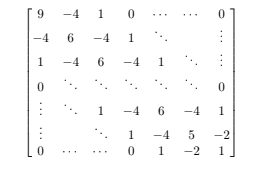
tomando $ \bar{b} = [1, 1, \dots, 1]^T $. Para $ n = 100 $ resolver por:




In [6]:
# Contrucción del aloritmo para la matriz A y el vector b
def matriz_24(n):
  A = np.zeros((n,n))

  #diagonal de repetida
  for i in range(1,n):
    A[i,i-1] = -4
    A[i-1,i] = -4
    A[i,i] = 6
    if  i > 1:
      A[i,i-2] = 1
      A[i-2,i] = 1

  #Rellenamos las partes de las esquimas
  A[0,0] = 9
  A[n-1,n-1] = 1
  A[n-2,n-2] = 5
  A[n-2,n-1] = -2
  A[n-1,n-2] = -2



  return A

def vector_24(n):
  b = np.ones(n)
  return b

print(matriz_24(4))
print(vector_24(5))

[[ 9. -4.  1.  0.]
 [-4.  6. -4.  1.]
 [ 1. -4.  5. -2.]
 [ 0.  1. -2.  1.]]
[1. 1. 1. 1. 1.]


**(a)** Factorización LU.



In [13]:
## Resolución con LU de la matrix de dimensión 100
x = Solver_LU(matriz_24(100),vector_24(100))
print("El vector solución de Ax=b es:",x)


El vector solución de Ax=b es: [1.26250000e+03 7.47500000e+03 1.85385000e+04 3.43550000e+04
 5.48275000e+04 7.98600000e+04 1.09357500e+05 1.43226000e+05
 1.81372500e+05 2.23705000e+05 2.70132500e+05 3.20565000e+05
 3.74913500e+05 4.33090000e+05 4.95007500e+05 5.60580000e+05
 6.29722500e+05 7.02351000e+05 7.78382500e+05 8.57735000e+05
 9.40327500e+05 1.02608000e+06 1.11491350e+06 1.20675000e+06
 1.30151250e+06 1.39912500e+06 1.49951250e+06 1.60260100e+06
 1.70831750e+06 1.81659000e+06 1.92734750e+06 2.04052000e+06
 2.15603850e+06 2.27383500e+06 2.39384250e+06 2.51599500e+06
 2.64022750e+06 2.76647600e+06 2.89467750e+06 3.02477000e+06
 3.15669250e+06 3.29038500e+06 3.42578850e+06 3.56284500e+06
 3.70149750e+06 3.84169000e+06 3.98336750e+06 4.12647600e+06
 4.27096250e+06 4.41677500e+06 4.56386250e+06 4.71217500e+06
 4.86166350e+06 5.01228000e+06 5.16397750e+06 5.31671000e+06
 5.47043250e+06 5.62510100e+06 5.78067250e+06 5.93710500e+06
 6.09435750e+06 6.25239000e+06 6.41116350e+06 6.570640

**(b)** Crear una rutina (*tipo banda*) para la estructura de la matriz y resolver. Comparar y comentar 24a y 24b.



In [14]:
## Construcción del algoritmo tipo banda

#Hacemos una función que cree las bandas

def banda(n):
  d = np.zeros(n) # banda diagonal
  d2i = np.zeros(n-1) #diagonal s2 inferior debajo de la diagonal principal
  d2s = np.zeros(n-1) #lo mismo pero superior
  d3i = np.ones(n-2) # la diagonal debajo de d2i llena de unos
  d3s = np.ones(n-2) # lo mismo pero la superior

  for i in range(n):
    d[i] = 6
    if i < n-1:
      d2i[i] = -4
      d2s[i] = -4

  d2i[n-2] = -2
  d2s[n-2] = -2

  d[0] = 9
  d[n-2] = 5
  d[n-1] = 1

  ab = np.zeros((5, n))  # 2 sup + 1 diag + 2 inf = 5 filas

  ab[0,2:] = d3s         # 3ra superior
  ab[1,1:] = d2s         # 2da superior
  ab[2,:] = d            # diagonal principal
  ab[3,:-1] = d2i        # 2da inferior
  ab[4,:-2] = d3i        # 3ra inferior

  return ab

print(banda(8))

[[ 0.  0.  1.  1.  1.  1.  1.  1.]
 [ 0. -4. -4. -4. -4. -4. -4. -2.]
 [ 9.  6.  6.  6.  6.  6.  5.  1.]
 [-4. -4. -4. -4. -4. -4. -2.  0.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.]]


In [15]:
## Resolución usando la estructura de banda

#tomemos la estructura de banda y luego eliminemos tomando eliminación de gauss y sustitucion hacía atras

def modo_banda(ab, b):
    ab = ab.copy()
    b = b.copy()
    n = len(b)

    #eliminación triangular por abajo
    for i in range(n - 2):
        # hacer 0 en en renglon 3
        pivote = ab[3, i] / ab[2, i]
        ab[3, i] -= pivote * ab[2, i]# ahora tomamos cada uno de los elementos de la fila que a lo más son 4 y operamos para hacer ceros debajo de la diagonal
        ab[2,i+1] -= pivote* ab[1,i+1]
        ab[1,i+2] -= pivote * ab[0,i+2]
        b[i+1] -= pivote * b[i]   # es la única operación que resulta familiar pues aún conserva su estructura de forma matricial


        #hacer 0 en el renglon 4
        pivote = ab[4, i] / ab[2, i] #Hacemos un proceso analogo para eliminar el otro 0 debajo del pivote y siempre a lo más hay que eliminar 2 ceros debajo de la diagonal, usando el mismo pivote por eso no salimos del ciclo
        ab[4, i] -= pivote * ab[2, i]
        ab[3,i+1] -= pivote* ab[1,i+1]
        ab[2,i+2] -= pivote * ab[0,i+2]
        b[i+2] -= pivote * b[i]


    pivote = ab[3, n-2] / ab[2, n-2] # en la frontera, la penúltima fila solo tenemos que hacer cero el último renglón realizamos el proceso solo y ahora solo aplicamos 3 operaciones en vez de cuatro pues ya no hay más elementos a los que aplicar operaciones
    ab[3, n-2] -= pivote * ab[2, n-2]
    ab[2,n-1] -= pivote* ab[1,n-1]
    b[n-1] -= pivote * b[n-2]

    #sustitución hacia atrás
    x = np.zeros(n)

    for i in range(n):
        sumcum = 0.0
        if i == 1:
          sumcum = ab[1,n-1]*x[n-1] # para la segunda vuelta del ciclo usamos esto y vemos que solo tenemos un elemento que corresponde a la última componente de x
        if i > 1:
          sumcum = ab[0,n+1-i]*x[n+1-i] + ab[1,n-i]*x[n-i] # después solo tendremos a lo más tres variables por renglón y sabremos el valor de dos, los que estan más a la derecha y sustituyendo tenemos esta igualdad
        x[n-1-i] = (b[n-1-i] - sumcum) / ab[2, n-1-i]

    return x

m = 100

print(matriz_24(m) @ modo_banda(banda(m),vector_24(m)))

print(matriz_24(m) @ Solver_LU(matriz_24(m),vector_24(m)))

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.99999999 1.         1.         1.         1.00000001 1.00000001
 1.         1.         0.99999999 1.00000001 0.99999999 1.
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         0.99999999 1.00000001 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99999999 1.         1.         1.00000001
 1.         0.99999999 1.         1.         1.         1.
 1.         1.         1.00000001 1.         0.99999999 1.00000001
 0.99999997 1.         0.9999999

Los resultados son identicos, sin embargo me parece una estrategia mucho más sencilla la factorización LU hay que hacer menos proceos y es mucho más fácil programarla. Para el planteamiento con bandas me llevo mucho tiempo depurar el codigo, aunque supongo que la última es más rápida porque dejamos de lado la matriz casi vacia para quedarnos con una matriz de 294 elementos a trabajar con una matriz de 1000 que contiene la misma información.

**(c)** Verificar que la matriz $ A $ tiene una factorización de la forma $ A = R R^T $, donde $ R $ es una matriz triangular superior de la forma:

$$
\begin{bmatrix}
2 & -2 & 1 & 0 & \cdots & 0 \\
0 & 1 & -2 & 1 & \cdots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0  \\
0 & \cdots & \cdots& \cdots & -2 & 1 \\
0 & \cdots & \cdots & \cdots & 1 & -2  \\
0 & \cdots & \cdots & \cdots & 0 & 1 \\
\end{bmatrix}
$$

Crear una rutina con la factorización $ R R^T $. Para $ n = 1000 $ resolver el sistema.

Comparar y resolver 24a, 24b y 24c.

In [17]:
## Construcción de la matriz R
def matriz_R(n):
  A = np.zeros((n,n))

  #diagonal de repetida
  for i in range(1,n):
    A[i-1,i] = -2
    A[i,i] = 1
    if  i > 1:
      A[i-2,i] = 1

  #Rellenamos las partes de las esquimas
  A[0,0] = 2

  return A

print(matriz_R(5))

[[ 2. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]
 [ 0.  0.  0.  0.  1.]]


In [31]:
## Resolución de la matriz usando R
def Solver_R(n):
  # A es una matriz_24 y b es un vector de unos
  #Resolvemos el sistema Ax = b ; RR^Tx = b, sea z = R^Tx;
  #Resolvemos primero Rz = b usando sustitución hacía atrás
  #Resolvemos R^Tx = z usando sustitución hacía adelante

  #Creamos la matriz R de dimnesión n
  R = matriz_R(n)
  Rt = np.transpose(R)
  b = np.ones(n)

  z = SustitucionAtras(R,b)

  x = SustitucionDelante(Rt,z)

  return x

print(Solver_R(1000))

[1.25125000e+05 7.49750000e+05 1.87287600e+06 3.49350500e+06
 5.61064000e+06 8.22328500e+06 1.13304450e+07 1.49311260e+07
 1.90243350e+07 2.36090800e+07 2.86843700e+07 3.42492150e+07
 4.03026260e+07 4.68436150e+07 5.38711950e+07 6.13843800e+07
 6.93821850e+07 7.78636260e+07 8.68277200e+07 9.62734850e+07
 1.06199940e+08 1.16606105e+08 1.27491001e+08 1.38853650e+08
 1.50693075e+08 1.63008300e+08 1.75798350e+08 1.89062251e+08
 2.02799030e+08 2.17007715e+08 2.31687335e+08 2.46836920e+08
 2.62455501e+08 2.78542110e+08 2.95095780e+08 3.12115545e+08
 3.29600440e+08 3.47549501e+08 3.65961765e+08 3.84836270e+08
 4.04172055e+08 4.23968160e+08 4.44223626e+08 4.64937495e+08
 4.86108810e+08 5.07736615e+08 5.29819955e+08 5.52357876e+08
 5.75349425e+08 5.98793650e+08 6.22689600e+08 6.47036325e+08
 6.71832876e+08 6.97078305e+08 7.22771665e+08 7.48912010e+08
 7.75498395e+08 8.02529876e+08 8.30005510e+08 8.57924355e+08
 8.86285470e+08 9.15087915e+08 9.44330751e+08 9.74013040e+08
 1.00413384e+09 1.034692

In [ ]:
import time

# Medición del tiempo
inicio = time.time()
resultado = mi_funcion()
fin = time.time()

print(f"Resultado: {resultado}")
print(f"Tiempo de ejecución: {fin - inicio:.6f} segundos")

In [38]:
## Comparación de resultados

m = 400

# Enfoque LU
print(Solver_LU(matriz_24(m),vector_24(m)))

# Enfoque banda
print(modo_banda(banda(m),vector_24(m)))

# Enfoque R
print(Solver_R(m))




[2.00499999e+04 1.19900000e+05 2.99150999e+05 5.57404998e+05
 8.94264996e+05 1.30933499e+06 1.80221999e+06 2.37252599e+06
 3.01985999e+06 3.74382998e+06 4.54404498e+06 5.42011498e+06
 6.37165097e+06 7.39826497e+06 8.49956996e+06 9.67517996e+06
 1.09247100e+07 1.22477759e+07 1.36439949e+07 1.51129849e+07
 1.66543649e+07 1.82677549e+07 1.99527759e+07 2.17090499e+07
 2.35361999e+07 2.54338499e+07 2.74016249e+07 2.94391509e+07
 3.15460549e+07 3.37219649e+07 3.59665098e+07 3.82793198e+07
 4.06600258e+07 4.31082598e+07 4.56236548e+07 4.82058448e+07
 5.08544648e+07 5.35691508e+07 5.63495398e+07 5.91952697e+07
 6.21059797e+07 6.50813097e+07 6.81209007e+07 7.12243947e+07
 7.43914347e+07 7.76216647e+07 8.09147296e+07 8.42702756e+07
 8.76879496e+07 9.11673996e+07 9.47082746e+07 9.83102246e+07
 1.01972901e+08 1.05695955e+08 1.09479039e+08 1.13321809e+08
 1.17223919e+08 1.21185025e+08 1.25204784e+08 1.29282854e+08
 1.33418894e+08 1.37612564e+08 1.41863525e+08 1.46171439e+08
 1.50535969e+08 1.549567

In [39]:
# Comparación de tiempo de ejecución
import time as time


inicio = time.time()
Solver_LU(matriz_24(m),vector_24(m))
fin = time.time()

print("Enfoque LU")
print(f"Tiempo de ejecución: {fin - inicio:.6f} segundos")

inicio = time.time()
modo_banda(banda(m),vector_24(m))
fin = time.time()

print("Enfoque Banda")
print(f"Tiempo de ejecución: {fin - inicio:.6f} segundos")

inicio = time.time()
Solver_R(m)
fin = time.time()

print("Enfoque R")
print(f"Tiempo de ejecución: {fin - inicio:.6f} segundos")


Enfoque LU
Tiempo de ejecución: 4.690261 segundos
Enfoque Banda
Tiempo de ejecución: 0.002967 segundos
Enfoque R
Tiempo de ejecución: 0.059640 segundos


Vemos que el enfoque banda es más grande para n muy grandes aunque el enfoque R no pierde mucho tiempo, sin embargo el enfoque LU es el más costoso, sin embargo la factorización solo es posible en matrices muy especificas, al igual que el enfoque banda, así que son más poderosas, solo en casos especiales.

In [12]:
#Funciones de la clase


import numpy as np

def SubMat(Mat, ren, col):
    """
    Crea una submatriz eliminando un renglón y una columna específicos de la matriz original.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz original de la cual se obtendrá la submatriz.
    ren : int
        Índice del renglón que se eliminará de la matriz.
    col : int
        Índice de la columna que se eliminará de la matriz.

    Retorna:
    --------
    numpy.ndarray
        Submatriz resultante después de eliminar el renglón y la columna especificados.

    Ejemplo:
    --------
    >>> Mat = np.array([[1, 2, 3],
    ...                [4, 5, 6],
    ...                [7, 8, 9]])
    >>> SubMat(Mat, 1, 1)
    array([[1, 3],
           [7, 9]])
    """
    # Crear una copia de la matriz original para no modificarla
    M1 = np.copy(Mat)

    # Eliminar el renglón especificado
    M1 = np.delete(M1, ren, axis=0)

    # Eliminar la columna especificada
    M1 = np.delete(M1, col, axis=1)

    return M1


import numpy as np

def Det(Mat):
    """
    Calcula el determinante de una matriz cuadrada de manera recursiva.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz cuadrada de la cual se calculará el determinante.
        Debe ser de tamaño n x n, donde n >= 2.

    Retorna:
    --------
    float
        El determinante de la matriz.

    Ejemplo:
    --------
    >>> Mat = np.array([[1, 2],
    ...                [3, 4]])
    >>> Det(Mat)
    -2.0

    >>> Mat = np.array([[6, 1, 1],
    ...                [4, -2, 5],
    ...                [2, 8, 7]])
    >>> Det(Mat)
    -306.0
    """
    # Caso base: matriz 2x2
    if Mat.shape[0] == 2 and Mat.shape[1] == 2:
        return Mat[0][0] * Mat[1][1] - (Mat[0][1] * Mat[1][0])

    # Caso recursivo: matrices más grandes
    deter = 0.0
    for col in range(Mat.shape[0]):
        # Calcula el cofactor y suma al determinante
        deter += ((-1) ** col) * Mat[0][col] * Det(SubMat(Mat, 0, col))
    return deter


import numpy as np

def Transpuesta(Mat):
    """
    Calcula la transpuesta de una matriz cuadrada modificando la matriz original.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz cuadrada de tamaño n x n que se transpondrá.
        La matriz se modificará in situ.

    Retorna:
    --------
    numpy.ndarray
        La matriz transpuesta. La matriz original también se modifica.

    Ejemplo:
    --------
    >>> Mat = np.array([[1, 2, 3],
    ...                [4, 5, 6],
    ...                [7, 8, 9]])
    >>> Transpuesta(Mat)
    array([[1, 4, 7],
           [2, 5, 8],
           [3, 6, 9]])
    """
    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            if ren < col:
                # Intercambia los elementos para obtener la transpuesta
                Mat[ren, col], Mat[col, ren] = Mat[col, ren], Mat[ren, col]
    return Mat



import numpy as np

def Cofactores(Mat):
    """
    Calcula la matriz de cofactores de una matriz cuadrada.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz cuadrada de tamaño n x n para la cual se calcularán los cofactores.

    Retorna:
    --------
    numpy.ndarray
        Matriz de cofactores, donde cada elemento es el cofactor correspondiente
        de la matriz original.

    Ejemplo:
    --------
    >>> Mat = np.array([[1, 2],
    ...                [3, 4]])
    >>> Cofactores(Mat)
    array([[ 4., -3.],
           [-2.,  1.]])
    """
    # Crear una matriz de ceros del mismo tamaño que Mat para almacenar los cofactores
    Cofa = np.zeros_like(Mat, dtype=float)

    # Calcular el cofactor para cada elemento de la matriz
    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            # Calcular el determinante de la submatriz (menor) y aplicar el signo
            Cofa[ren, col] = ((-1) ** (ren + col)) * Det(SubMat(Mat, ren, col))
    return Cofa



import numpy as np

def Inv(Mat):
    """
    Calcula la inversa de una matriz cuadrada utilizando la matriz de cofactores.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz cuadrada de tamaño n x n que se invertirá.
        Debe ser una matriz no singular (su determinante debe ser distinto de cero).

    Retorna:
    --------
    numpy.ndarray
        La matriz inversa de la matriz original.

    Ejemplo:
    --------
    >>> Mat = np.array([[4, 7],
    ...                [2, 6]])
    >>> Inv(Mat)
    array([[ 0.6, -0.7],
           [-0.2,  0.4]])
    """
    # Calcular el determinante de la matriz
    deter = Det(Mat)

    # Verificar si la matriz es singular (determinante = 0)
    if deter == 0:
        raise ValueError("La matriz es singular y no tiene inversa.")

    # Calcular la matriz de cofactores
    Cofac = Cofactores(Mat)

    # Transponer la matriz de cofactores para obtener la matriz adjunta
    Cofac = Transpuesta(Cofac)

    # Calcular la inversa multiplicando la adjunta por 1/determinante
    Inversa = (1 / deter) * Cofac

    return Inversa



A=np.array([[2,3,-4],[0,-4,2],[1,-1,5]])
b=np.array([1.0,1.0,1.0])

import numpy as np

def SolveInv(Mat, vec):
    """
    Resuelve un sistema de ecuaciones lineales utilizando la matriz inversa.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Matriz cuadrada de coeficientes del sistema de ecuaciones.
        Debe ser una matriz no singular (su determinante debe ser distinto de cero).

    vec : numpy.ndarray
        Vector de términos independientes.
        Su tamaño debe coincidir con el número de filas de la matriz `Mat`.

    Retorna:
    --------
    numpy.ndarray
        Vector solución del sistema de ecuaciones `Mat @ x = vec`.

    Excepciones:
    ------------
    ValueError
        Se lanza un error si la matriz `Mat` no es invertible.

    Ejemplo:
    --------
    >>> Mat = np.array([[2, 1],
    ...                 [5, 3]])
    >>> vec = np.array([4, 10])
    >>> SolveInv(Mat, vec)
    array([2., 0.])

    """
    # Calcular la inversa de la matriz
    InvMat = Inv(Mat)

    # Multiplicar la inversa por el vector de términos independientes
    Solucion = InvMat @ vec

    return Solucion


import numpy as np
from numpy import linalg as LA


def SustitucionDelante(Mat, b):
    """
    Realiza la sustitución hacia adelante para resolver un sistema de ecuaciones lineales
    representado por una matriz triangular inferior.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Una matriz triangular inferior de tamaño n x n.
    b : numpy.ndarray
        Un vector de términos independientes de tamaño n.

    Retorna:
    --------
    x : numpy.ndarray
        Un vector solución de tamaño n que satisface la ecuación Mat @ x = b.

    Descripción:
    ------------
    Esta función resuelve un sistema de ecuaciones lineales de la forma Mat @ x = b,
    donde Mat es una matriz triangular inferior. Utiliza el método de sustitución hacia adelante,
    comenzando desde la primera fila de la matriz y avanzando hacia la última.

    Ejemplo:
    --------
    >>> Mat = np.array([[1, 0, 0],
    ...                 [2, 3, 0],
    ...                 [4, 5, 6]])
    >>> b = np.array([1, 8, 32])
    >>> SustitucionDelante(Mat, b)
    array([1., 2., 3.])
    """
    n = Mat.shape[0]
    x = np.zeros(n)

    for i in range(n):
        SumCum = 0.0
        for j in range(i):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]

    return x

def SustitucionAtras(Mat, b):
    """
    Realiza la sustitución hacia atrás para resolver un sistema de ecuaciones lineales
    representado por una matriz triangular superior.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Una matriz triangular superior de tamaño n x n.
    b : numpy.ndarray
        Un vector de términos  independientes de tamaño n.

    Retorna:
    --------
    x : numpy.ndarray
        Un vector solución de tamaño n que satisface la ecuación Mat @ x = b.

    Descripción:
    ------------
    Esta función resuelve un sistema de ecuaciones lineales de la forma Mat @ x = b,
    donde Mat es una matriz triangular superior. Utiliza el método de sustitución hacia atrás,
    comenzando desde la última fila de la matriz y avanzando hacia la primera.

    Ejemplo:
    --------
    >>> Mat = np.array([[3, 2, 1],
    ...                 [0, 2, 1],
    ...                 [0, 0, 1]])
    >>> b = np.array([6, 4, 1])
    >>> SustitucionAtras(Mat, b)
    array([1., 1., 1.])
    """
    n = Mat.shape[0]
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        SumCum = 0.0
        for j in range(i+1, n):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]

    return x

def LU(A):
  U=np.copy(A)
  L=np.eye(A.shape[0])

  for i in range(A.shape[0]):
    Li=np.eye(A.shape[0])
    for j in range(i+1,A.shape[0]):
      Li[j,i]=-U[j,i]/U[i,i]
      L[j,i]=U[j,i]/U[i,i]
    U=Li@U
  return L,U

def Solver_LU(A,b):
  L,U=LU(A)
  # El sistema que se resuelve es Ly=b
  y=SustitucionDelante(L, b)
  # El sistema que se resuelve es Ux=y
  x=SustitucionAtras(U, y)

  return x

## Funciones de ejercicios anteriores de la tarea
def LU_parcial(A):
    n = A.shape[0]
    U = np.copy(A)
    L = np.eye(n)
    P = np.eye(n)

    for i in range(n):
        # Encontrar fila con valor absoluto máximo en la columna i
        max_val = abs(U[i, i])
        max_row = i
        for k in range(i+1, n):
            if abs(U[k, i]) > max_val:
                max_val = abs(U[k, i])
                max_row = k

        # Intercambiar filas si es necesario
        if max_row != i:
            U[[i, max_row], :] = U[[max_row, i], :] # el corchete dentro de la posición de las filas sirve como multiasignación así no creamos variables de apoyo
            P[[i, max_row], :] = P[[max_row, i], :]
            if i > 0: # tenemos que solo se intercambia después de la primera interación por justamente en la primer vuelta no hemos calculado nada y sigue siendo la identidad solo intercambiariamos ceros identicos
                L[[i, max_row], :i] = L[[max_row, i], :i] # sin embargo para la segunda vuelta ya habremos calculado por lo menos un elemento que no esta en la diagonal de la columna 1, entonces ya es necesario intercambiar
                                                          # y solo intercambiamos hasta antes de la columna i, pues solo nos interesan la parte triangular inferior, la diagonal son unos por definición
        # Eliminación gaussiana
        for j in range(i+1, n):
            L[j, i] = U[j, i] / U[i, i]
            U[j, :] = U[j, :] - (L[j, i] * U[i, :])

    return P, L, U

def Solver_LUParcial(A, b):
    # Resuelve el sistema Ax = b usando la factorización LU con pivoteo parcial.
    # como Ax =b y PA = LU entonces LUx = PAx = Pb así resolvemos
    # LUx = Pb
    P, L, U = LU_parcial(A)
    Pb = P @ b
    z = SustitucionDelante(L, Pb)
    x = SustitucionAtras(U, z)
    return x

def LU_total(A):
    n = A.shape[0]
    U = np.copy(A)
    L = np.eye(n)
    P = np.eye(n)
    Q = np.eye(n)

    for i in range(n):
        # Buscar el índice del valor absoluto máximo en submatriz U[i:, i:]
        max_val = abs(U[i, i])
        max_row, max_col = i, i
        for r in range(i, n):
            for s in range(i, n):
                if abs(U[r, s]) > max_val:
                    max_val = abs(U[r, s])
                    max_row, max_col = r, s

        # Intercambiar filas si es necesario
        if max_row != i:
            U[[i, max_row], :] = U[[max_row, i], :] # el corchete dentro de la posición de las filas sirve como multiasignación así no creamos variables de apoyo
            P[[i, max_row], :] = P[[max_row, i], :]
            if i > 0: # tenemos que solo se intercambia después de la primera interación por justamente en la primer vuelta no hemos calculado nada y sigue siendo la identidad solo intercambiariamos ceros identicos
                L[[i, max_row], :i] = L[[max_row, i], :i] # sin embargo para la segunda vuelta ya habremos calculado por lo menos un elemento que no esta en la diagonal de la columna 1, entonces ya es necesario intercambiar
                                                          # y solo intercambiamos hasta antes de la columna i, pues solo nos interesan la parte triangular inferior, la diagonal son unos por definición


        # Intercambio de columnas si es necesario
        if max_col != i:
            U[:, [i, max_col]] = U[:, [max_col, i]]
            Q[:, [i, max_col]] = Q[:, [max_col, i]]
            # Ahora vemos que no intercambiamos las columnas de L en ninguna ocasión porque L guarda en la parte triangular inferior todos los pivotes correspondientes a cada fila para la eliminación de los terminos debajo de la diagonal
            # sin embargo ahora los renglones no se movieron y el pivote de eliminación sigue correspondiendo a esa misma fila, tampoco debemos tener cuidado en el cambio de orden de las variables
            # pues el pivote afecta a toda la fila por igual no importa en que orden se encuentre y el cambio en U no afecta en nada

        # Eliminación gaussiana
        for j in range(i+1, n):
            L[j, i] = U[j, i] / U[i, i]
            U[j, :] = U[j, :] - (L[j, i] * U[i, :])

    return P, L, U, Q

def Solver_LUtotal(A, b):
    # Resuelve el sistema Ax = b usando la factorización LU con pivoteo total.
    # como Ax = b y PAQ = LU entonces PA = LUQ^-1, LUQ^-1x = PAx = Pb entonces sea y = Q^-1x tenemos que LUy = Pb
    #  Resolvemos LUy = Pb
    P, L, U, Q = LU_total(A)
    Pb = P @ b
    z = SustitucionDelante(L, Pb)
    y = SustitucionAtras(U, z)
    # Resolvemos y = Q^-1x donde x = Qy
    x = Q @ y

    return x